In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class Load_Dataset:
    def __init__(self, path):
        self.path = path

    def load_data(self):
        df = pd.read_csv(self.path)
        return df

In [4]:
file_name = "2025.06.16 1112 - dt-daily-usage.csv"

try:
    data_loader = Load_Dataset(file_name)
    df = data_loader.load_data()
    print("File Loaded succesfully")
    print(f"List of columns: {df.columns} ")
except FileNotFoundError as e:
    print(f"File: {file_name} not found error: {e}")

File Loaded succesfully
List of columns: Index(['Timestamp (UTC)', 'Meter Number', 'Usage Amount'], dtype='object') 


In [ ]:
df['Timestamp (UTC)'] = pd.to_datetime(df['Timestamp (UTC)'])

In [7]:
df.info()
print("Total Missing values in each column")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8404 entries, 0 to 8403
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Timestamp (UTC)  8404 non-null   datetime64[ns, UTC]
 1   Meter Number     8404 non-null   int64              
 2   Usage Amount     8404 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 197.1 KB
Total Missing values in each column


Timestamp (UTC)    0
Meter Number       0
Usage Amount       0
dtype: int64

In [8]:
df['day_of_week'] = df['Timestamp (UTC)'].dt.day_name()
df['month'] = df['Timestamp (UTC)'].dt.month_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

print('\nDataset with New Columns')
df.columns


Dataset with New Columns


Index(['Timestamp (UTC)', 'Meter Number', 'Usage Amount', 'day_of_week',
       'month', 'is_weekend'],
      dtype='object')

# **Exploratory Data Analysis**

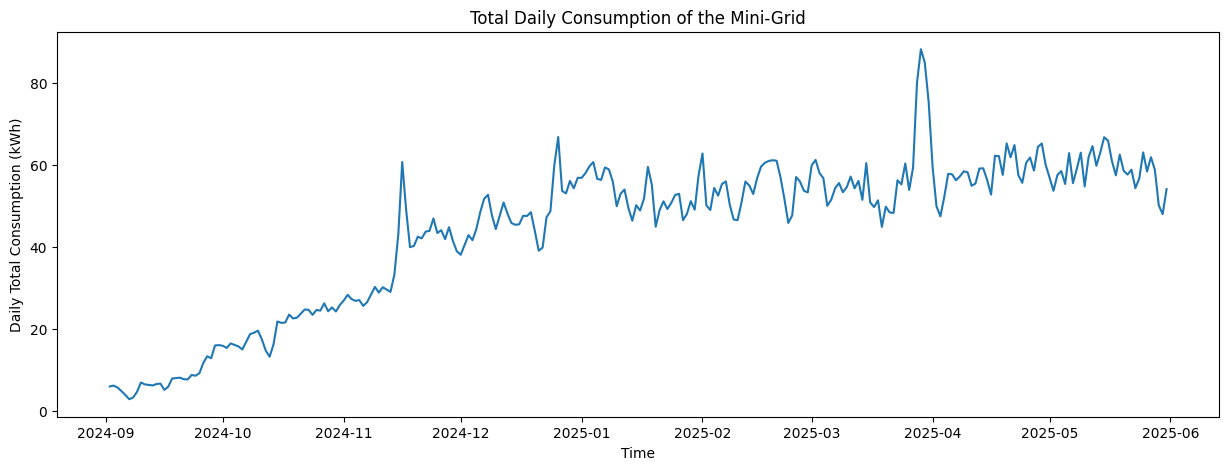

In [10]:
# Calculate total consumption per day

total_daily_consumption = df.groupby('Timestamp (UTC)')['Usage Amount'].sum().reset_index()

#Plot

plt.figure(figsize=(15,5))
sns.lineplot(data=total_daily_consumption, x='Timestamp (UTC)', y='Usage Amount')
plt.title('Total Daily Consumption of the Mini-Grid')
plt.xlabel('Time')
plt.ylabel('Daily Total Consumption (kWh)')
plt.show()